<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/Copia_de_Semana_12_Tema_12_TensorBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorBoard

En el aprendizaje automático, para mejorar algo, a menudo es necesario poder medirlo. TensorBoard es una herramienta para proporcionar las medidas y visualizaciones necesarias durante el flujo de trabajo de aprendizaje automático. Permite rastrear métricas de experimentos como pérdida y precisión, visualizar el gráfico del modelo, proyectar vectores o embedding en un espacio dimensional inferior y mucho más.

Esta herramienta ejecuta un servidor local que muestra una página web. Los datos son almacenados de forma local, esto implica que no debemos subir nuestros datos a servidores en la nube.

Es importante mencionar que se debe tener en cuenta que hay 2 argumentos importantes para las funciones:

- tag: Bajo que nombre voy a escribir los datos
- global_step: Paso en el que estoy escribiendo los datos

`IMPORTATE: vamos a ver puntos que a lo mejor hoy no se comprendan o se hayan dado y los cuales no se van a profundizar porque son temas de otras materias.`

`EJECUTAR CELDA POR CELDA NO TODO JUNTO!!!`

## Instalación

In [ ]:
!pip install -q tensorboard

## Versión

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
# Levantamos la extensión para notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Modelo

Vamos a ejecutar el modelo que creamos en la práctica 11.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# nombre con el que vamos a guardar el modelo
model_filename = 'model_FashionMNIST.pth'

# Este es el conjunto de etiquetas (labels) del dataset FashionMNIST
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# descargamos el dataset de entrenamiento
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
# descargamos el dataset de test
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)
# Creamos los DataLoades desde los dataset de training_data y test_data, a su
# vez le decimos que queremos minibatches de 64 elementos y que cada minibatch
# se mescle.
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Definimos nuestro modelo
class NeuralNetwork(nn.Module):
  def __init__(self):
    """ Inicializamos la red. Esto quiere decir que vamos a crear todos los
        objetos que necesitaremos utilizar en nuestra red.
    """
    super().__init__()
    # Reduce las dimensiones de un tensor (vector listos para
    # trabajar en cpu/gpu)
    self.flatten = nn.Flatten()
    # Vamos a definir una secuencia de pasos que debe ejecutar nuestra red neuronal
    self.linear_relu_stack = nn.Sequential(
      # Esta capa como entrada un tensor de 28x28 (o 784 posiciones,
      # osea nuestra imagen) y la salida o predicción va a ser un tensor de
      # 512 posiciones
      nn.Linear(28*28, 512),
      # Es un capa que toma los siguientes valores max(0,x), es decir,
      # si el valor es menor a 0 entonces retorna 0, en caso contrario
      # retorna el valor.
      nn.ReLU(),
      nn.Linear(512, 512),
      nn.ReLU(),
      # Al final creamos otra transformación lineal que recibe un tensor con 512
      # posiciones y va a salir un tensor de 10 posiciones que son las etiquetas
      # o tipos de prendas del dataset FashionMNIST
      nn.Linear(512, 10)
    )

  def forward(self, x):
    """ Especificamos como se va a trabajar con los datos para entrenar el red neuronal

    Args:
      x (Tensor): Tensor con los valores de la imágen, en nuestro caso, recibimos
                    una matriz de 28*28.
    """
    # Realizamos el Flatten
    x_flatten = self.flatten(x)
    # Aplicamos la secuencia y obtenemos las probabilidades de que sea cada una
    # de las etiquetas o tipos de prendas del datasetFashionMNIST
    logits = self.linear_relu_stack(x_flatten)

    # Retornamos las probabilidades
    return logits

# Verificamos que dispositivo tenemos disponible para entrenar
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
# Recuerden que en colab, desde el menú de (Runtime -> Change runtime type)
# podemos cambiar el tipo de procesasor que vamos a utilizar, por ejemplo:
# cpu o cuda o tpu
print(f"Utilizaremos el dispositivo: {device}")

# Creamos nuestra clase
model = NeuralNetwork().to(device)

# tasa de aprendisaje
learning_rate = 1e-2
# tamaño del lote
batch_size = 64
# número de epocas
epochs = 10

100%|██████████| 26421880/26421880 [00:14<00:00, 1803753.84it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 116365.63it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2190935.97it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24676887.99it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Utilizaremos el dispositivo: cpu


## [SummaryWrite](https://pytorch.org/docs/stable/tensorboard.html)

Para trabajar con tensorboard desde pytorch vamos a utilizar la clase SummaryWriter.

In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
# Directorio donde vamos a guardar los archivos que necesita tensorboard
tensorboard_logs_folder = "/content/tensorboard_logs/"

Cada vez que ejecutemos un script debemos volver a la celda de abajo y presionar el botón de refrescar que se encuentra arriba a la derecha
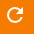

**Es muy importarte segir los instrucciones de cada script**

In [ ]:
# Matamos el proceso actual de tensorboard
!kill $(ps ax | grep tensorboard_logs | awk '{ if ($5 ~ /logdir/ || $6 ~ /logdir/ || $7 ~ /logdir/) print $1}')
# Vamos a limpiar el directorio de trabajo
!rm -rf {tensorboard_logs_folder}
# Ejecutamos la extensión para colab, le pasamos el direcorio que definimos anteriormente
%tensorboard --logdir {tensorboard_logs_folder}
# EL REFRESCO DE LOS DATOS NO ES INSTANTANEO, A VECES DEBEMOS PRESIONAR VARIAS
# VECES EL BOTÓN DE REFRESCAR

<IPython.core.display.Javascript object>

## Escalares

Agregamos valores númericos para cada step o un diccionario con números para comparar gráficas en cada step.

In [ ]:
# Matamos el proceso actual de tensorboard
!kill $(ps ax | grep tensorboard_logs | awk '{ if ($5 ~ /logdir/ || $6 ~ /logdir/ || $7 ~ /logdir/) print $1}')
# Vamos a limpiar el directorio de trabajo
!rm -rf {tensorboard_logs_folder}

In [ ]:
import math
# Inicializamos el objeto SummaryWrite y le pasamos el argumento con el
# directorio de trabajo
summary_writer = SummaryWriter(log_dir=tensorboard_logs_folder)
for i in range(1,10):
  # Dibujamos las gráficas de los logaritmos
  summary_writer.add_scalar(tag="Logaritmo", scalar_value=math.log(i),  global_step=i)
  summary_writer.add_scalar(tag="Logaritmo 2", scalar_value=math.log2(i),  global_step=i)
  summary_writer.add_scalar(tag="Logaritmo 10", scalar_value=math.log10(i),  global_step=i)
  # Agregamos los 3 valores dentro de 1 sola gráfica para compararlos
  summary_writer.add_scalars(main_tag="LOGARTIMOS",
                             tag_scalar_dict={"log":math.log(i),
                                              "log2":math.log2(i),
                                              "log10":math.log10(i),},
                              global_step=i)

# Cerramos la escritura
summary_writer.close()

Ver el tab `SCALARS` o

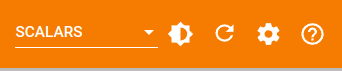

In [ ]:
# Ejecutamos la extensión para colab, le pasamos el direcorio que definimos anteriormente
%tensorboard --logdir {tensorboard_logs_folder}

<IPython.core.display.Javascript object>

## Textos

In [ ]:
# Matamos el proceso actual de tensorboard
!kill $(ps ax | grep tensorboard_logs | awk '{ if ($5 ~ /logdir/ || $6 ~ /logdir/ || $7 ~ /logdir/) print $1}')
# Vamos a limpiar el directorio de trabajo
!rm -rf {tensorboard_logs_folder}

In [ ]:
import math
# Inicializamos el objeto SummaryWrite y le pasamos el argumento con el
# directorio de trabajo
summary_writer = SummaryWriter(log_dir=tensorboard_logs_folder)
# Dibujamos las gráficas de los logaritmos
summary_writer.add_text(tag="Readme",
                        text_string=
"""In egestas non tortor at tempor. Nullam maximus mi ac pharetra dictum. Sed
condimentum diam orci, eget condimentum ipsum convallis quis. Sed ut
perspiciatis, unde omnis iste natus error sit voluptatem accusantium doloremque
laudantium, totam rem aperiam eaque ipsa, quae ab illo inventore veritatis et
quasi architecto beatae vitae dicta sunt, explicabo.

Nullam maximus mi ac pharetra dictum. Sed condimentum diam orci, eget
condimentum ipsum convallis quis. Sed ut perspiciatis, unde omnis iste natus
error sit voluptatem accusantium doloremque laudantium, totam rem aperiam eaque
ipsa, quae ab illo inventore veritatis et quasi architecto beatae vitae dicta
sunt, explicabo. Nemo enim ipsam voluptatem, quia voluptas sit, aspernatur aut
odit aut fugit, sed quia consequuntur magni dolores eos, qui ratione voluptatem
sequi nesciunt, neque porro quisquam est, qui dolorem ipsum, quia dolor sit amet
consectetur adipiscing velit, sed quia non numquam do eius modi tempora
inci[di]dunt, ut labore et dolore magnam aliquam quaerat voluptatem.""",
                        global_step=0)

summary_writer.add_text(tag="Recomendation",
                        text_string=
"""Duis a arcu convallis, gravida purus eget, mollis diam. Praesent non urna
non mauris laoreet ultricies eget at enim. Phasellus lacus odio, ullamcorper ac
ipsum in, tincidunt tincidunt massa. Suspendisse ut malesuada sapien, vitae
mollis diam.

Praesent non urna non mauris laoreet ultricies eget at enim. Phasellus lacus
odio, ullamcorper ac ipsum in, tincidunt tincidunt massa. Suspendisse ut
malesuada sapien, vitae mollis diam. Suspendisse tristique et ex non faucibus.""",
                        global_step=0)

# Cerramos la escritura
summary_writer.close()

Ver el tab `TEXT` o

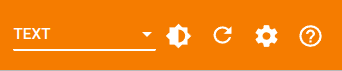


In [ ]:
# Ejecutamos la extensión para colab, le pasamos el direcorio que definimos anteriormente
%tensorboard --logdir {tensorboard_logs_folder}

<IPython.core.display.Javascript object>

## Imagenes del dataset y grafo

In [ ]:
# Matamos el proceso actual de tensorboard
!kill $(ps ax | grep tensorboard_logs | awk '{ if ($5 ~ /logdir/ || $6 ~ /logdir/ || $7 ~ /logdir/) print $1}')
# Vamos a limpiar el directorio de trabajo
!rm -rf {tensorboard_logs_folder}

In [ ]:
import torchvision
# Inicializamos el objeto SummaryWrite y le pasamos el argumento con el
# directorio de trabajo
summary_writer = SummaryWriter(log_dir=tensorboard_logs_folder)
# Instanciamos el modelo
model = NeuralNetwork()
# TRAIN
# Creamos un iterador sobre el dataloader del dataset de train
iter_train_dataloader = iter(train_dataloader)
images, labels = next(iter_train_dataloader)
# Agegamos las imágenes a una grilla
grid = torchvision.utils.make_grid(images)
# Escribimos la imagen
summary_writer.add_image("Imágenes del dataset de train", grid, global_step=0)
images, labels = next(iter_train_dataloader)
grid = torchvision.utils.make_grid(images)
summary_writer.add_image("Imágenes del dataset de train", grid, global_step=1)
# Generamos un grafo del modelo
summary_writer.add_graph(model, images)
# TEST
# Creamos un iterador sobre el dataloader del dataset de train
iter_test_dataloader = iter(test_dataloader)
images, labels = next(iter_test_dataloader)
# Agegamos las imágenes a una grilla
grid = torchvision.utils.make_grid(images)
# Escribimos la imagen
summary_writer.add_image("Imágenes del dataset de test", grid, global_step=0)
images, labels = next(iter_test_dataloader)
grid = torchvision.utils.make_grid(images)
summary_writer.add_image("Imágenes del dataset de test", grid, global_step=1)
# Generamos un grafo del modelo
summary_writer.add_graph(model, images)
# Cerramos la escritura
summary_writer.close()

Ver el tab `IMAGES` o

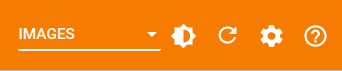

Ver el tab `graphs` o

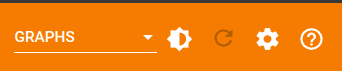

```txt
VER LOS TABS IMAGES Y GRAPHS
Images, muestra las imágenes de los dataset que cargamos con los títulos
Graphs, muestra el grafo del modelo y si le hacemos zoom (con la rueda del
moues) podemos ver como son las entradas (64x1x28x28) y las salidas (64x10).
```

Utilizar el slider para ver los steps (pasos)

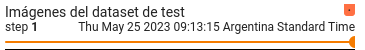

In [ ]:
# Ejecutamos la extensión para colab, le pasamos el direcorio que definimos anteriormente
%tensorboard --logdir {tensorboard_logs_folder}

<IPython.core.display.Javascript object>

## Embeddings

Vamos a mostar los embeddings de las imágenes y de esta forma visualizar algún tipo de patrón.

In [ ]:
# Matamos el proceso actual de tensorboard
!kill $(ps ax | grep tensorboard_logs | awk '{ if ($5 ~ /logdir/ || $6 ~ /logdir/ || $7 ~ /logdir/) print $1}')
# Vamos a limpiar el directorio de trabajo
!rm -rf {tensorboard_logs_folder}

In [ ]:
import torchvision
# Inicializamos el objeto SummaryWrite y le pasamos el argumento con el
# directorio de trabajo
summary_writer = SummaryWriter(log_dir=tensorboard_logs_folder)
# Etiquetas que queremos mostrar
labels=[]
# Imágenes
images=[]
emb_by_label = {}
# Iteramos todas las imágenes del dataset de train
for pos, emb in enumerate(iter(test_data)):
  # Agregamos el embedding, en la posición 0 tenemos el vector y en la posición
  # 1 tenemos el id de la etiqueta
  l = labels_map[emb[1]]
  labels.append(l)
  # debemos agregar 1 vector por lo tanto hacemos un flatten para aplanarlo
  e = emb[0].squeeze().flatten()
  images.append(e)
  if l not in emb_by_label:
    emb_by_label[l] = []
  emb_by_label[l].append(e)

  if pos == 1000:
    # Cortamos a los 1000 embeddings
    break
# Agregamos una proyección para todas las imágenes
summary_writer.add_embedding(torch.stack(images), global_step=0, metadata=labels, tag="ALL")
# Agregamos una proyección por label
for k,v in emb_by_label.items():
  summary_writer.add_embedding(torch.stack(v), global_step=0, tag=k)

# Cerramos la escritura
summary_writer.close()

Ver el tab `Porjector`

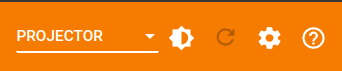

In [ ]:
# Ejecutamos la extensión para colab, le pasamos el direcorio que definimos anteriormente
%tensorboard --logdir {tensorboard_logs_folder}

<IPython.core.display.Javascript object>

## Metricas del entrenamiento

Vamos a modificar un poco las funciones originales `train_loop` y `test_loop` para agregar el`summary_writer`.

In [ ]:
# Matamos el proceso actual de tensorboard
!kill $(ps ax | grep tensorboard_logs | awk '{ if ($5 ~ /logdir/ || $6 ~ /logdir/ || $7 ~ /logdir/) print $1}')
# Vamos a limpiar el directorio de trabajo
!rm -rf {tensorboard_logs_folder}

In [ ]:
import torchvision
import statistics
# Inicializamos el objeto SummaryWrite y le pasamos el argumento con el
# directorio de trabajo
summary_writer = SummaryWriter(log_dir=tensorboard_logs_folder)
# Instanciamos el modelo
model = NeuralNetwork()


# Bucle de entrenamiento
def train_loop(dataloader: DataLoader,
              model: NeuralNetwork,
              loss_fn: nn.CrossEntropyLoss,
              optimizer: torch.optim.SGD) -> tuple:
  """ Bucle de entrenamiento

  Args:
    dataloader (DataLoader): Dataloader
    model (NeuralNetwork): Modelo
    loss_fn (nn.CrossEntropyLoss): Función de loss
    optimizer (torch.optim.SGD): Optimizador

  Returns:
    (loss, total_correct): Retorna el loss promedio y el promedio de las
      predicciones correctas
  """
  # Tamaño del dataset
  size = len(dataloader.dataset)
  # Iterador sobre los batch
  avg_loss = []
  avg_total_correct = []
  for batch, (X, y) in enumerate(dataloader):
    # Pasamos los tensores a un device
    X = X.to(device)
    y = y.to(device)
    # Calculo de la predicción
    pred = model(X)
    pred.to(device)
    # Calculo el loss
    loss = loss_fn(pred, y)

    # SE AGEGÓ UN LISTA PARA SUMAR LOS VALORES Y OBTENER EL PROMEDIO
    avg_loss.append(loss.item())
    avg_total_correct.append((pred.argmax(1) == y).type(torch.float).sum().item())

    # Backpropagation
    loss.backward()
    # Hago la optimización del paso
    optimizer.step()
    # Reestablesco los gradientes a 0
    optimizer.zero_grad()

    if batch % 100 == 0:
      # Si el batch es múltiplo de 100 muestro los datos
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
  # SE AGREGÓ QUE RETORNE EL LOSS Y LAS PREDICCIONES CORRECTAR
  return statistics.mean(avg_loss), statistics.mean(avg_total_correct)

# Bucle para testear
def test_loop(dataloader: DataLoader,
              model: NeuralNetwork,
              loss_fn: nn.CrossEntropyLoss) -> tuple:
  """ Bucle de entrenamiento

  Args:
    dataloader (DataLoader): Dataloader
    model (NeuralNetwork): Modelo
    loss_fn (nn.CrossEntropyLoss): Función de loss

  Returns:
    (test_loss, correct, test_labels, test_precisions): Retorna el loss
      promedio, el promedio de las predicciones correctas, una lista con las
      etiquetas y una lista con las etiquetas predecidas.
  """
  # Tamaño del dataset
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0
  test_labels, test_predictions = [],[]
  # Desactivo los gradientes
  with torch.no_grad():
    # Itero el dataloader
    for X, y in dataloader:
      # Pasamos los tensores a un device
      X = X.to(device)
      y = y.to(device)

      # Realizó la predicción
      pred = model(X)

      # Acumulo las etiquetas
      test_labels.extend(y.tolist())
      # Acumulo las etiquetas predecidas
      test_predictions.extend(pred.clone().argmax(1).tolist())

      # Calculo el loss
      test_loss += loss_fn(pred, y).item()
      # Calculo cuantas predicciones son correctas
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  # Divido el loss por la cantidad de batchs, esto me da el loss promedio de
  # los batchs
  test_loss /= num_batches
  # Divido los correctos por la cantidad de imágenes, lo que me da el porcentaje
  # de predicciones correctas
  correct /= size
  print(f"Errores en Test: \n\tAccuracy: {(100*correct):>0.1f}% \n\tAvg loss: {test_loss:>8f} \n")
  # SE AGREGÓ QUE RETORNE EL LOSS Y LAS PREDICCIONES CORRECTAR
  return test_loss, correct, test_labels, test_predictions



def train_model(epochs:int = 10, model_filename:str = model_filename):
  """ Entrena y guarda el modelo.

  Args:
    epochs (int): Cantidad de epocas que se debe entrenar.
    model_filename (str): Nombre del modelo que se guarda.
  """
  linear_dimensions = ["linear_784x512",
                       "relu_1",  # no contiene parametros
                       "linear_512x512",
                       "relu_2", # no contiene parametros
                       "linear_512x10"]
  # Comienzo las iteraciones
  for epoch in range(epochs):
      print(f"Epoca {epoch+1}")
      print("-"*80)
      train_loss, train_total_correct = train_loop(train_dataloader, model, loss_fn, optimizer)
      # La función test_loop ahora retorna el loss y las predicciones correctas,
      # entonces puedo crear un gráfico del loss, de las predicciones correctas,
      # y del accuracy
      summary_writer.add_scalar(
          tag="train_loss", scalar_value=train_loss, global_step=epoch)
      summary_writer.add_scalar(
          tag="train_correct", scalar_value=train_total_correct, global_step=epoch)
      summary_writer.add_scalar(
          tag="train_accuracy",
          scalar_value=train_total_correct/ len(train_dataloader),
          global_step=epoch)
      print()

      test_loss, test_total_correct, test_labels, test_predictions = test_loop(test_dataloader, model, loss_fn)
      # La función test_loop ahora retorna el loss y las predicciones correctas,
      # entonces puedo crear un gráfico del loss, de las predicciones correctas,
      # y del accuracy
      summary_writer.add_scalar(
          tag="test_loss", scalar_value=test_loss, global_step=epoch)
      summary_writer.add_scalar(
          tag="test_correct", scalar_value=test_total_correct, global_step=epoch)
      summary_writer.add_scalar(
          tag="test_accuracy",
          scalar_value=test_total_correct/ len(test_dataloader),
          global_step=epoch)

      summary_writer.add_pr_curve(tag="precision_recall_curve",
                              labels=torch.as_tensor(test_labels),
                              predictions=torch.as_tensor(test_predictions),
                              global_step=epoch)

      linear_id = 0
      # Vamos a crear un histograma para ver como fueron cambiando los parámetros
      # y el bais de cada Linear
      for p,l in enumerate(model.linear_relu_stack):
        for k,v in l._parameters.items():
          if k == "weight":
            # Agregamos los pesos de cada una de las capas
            summary_writer.add_histogram(
                tag=f"layer_{linear_dimensions[linear_id]}.weight",
                values=v,
                global_step=epoch)
          elif k == "bias":
            # Agregamos los bias de cada una de las capas
            summary_writer.add_histogram(
                tag=f"layer_{linear_dimensions[linear_id]}.bias",
                values=v,
                global_step=epoch)
        linear_id +=1



  # Vamos aguardar los hiperparámetros del modelo
  # tasa de aprendisaje
  summary_writer.add_hparams(
            {
                "learning_rate": learning_rate,
                "batch_size": batch_size,
                "epochs": epochs
            },
            {
                "train_accuracy": train_total_correct/ len(train_dataloader),
                "train_loss": train_loss,
                "test_accuracy": test_total_correct/ len(test_dataloader),
                "test_loss": test_loss,
            },
        )
  print("Fin!")

# Inicializamos la función de loss
loss_fn = nn.CrossEntropyLoss()
# Inicializamos el optimizador
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_model(epochs)
# Cerramos la escritura
summary_writer.close()

Epoca 1
--------------------------------------------------------------------------------
loss: 2.299226  [   64/60000]
loss: 2.171101  [ 6464/60000]
loss: 1.872361  [12864/60000]
loss: 1.568659  [19264/60000]
loss: 1.228794  [25664/60000]
loss: 1.010094  [32064/60000]
loss: 0.983158  [38464/60000]
loss: 0.849760  [44864/60000]
loss: 0.858105  [51264/60000]
loss: 0.989198  [57664/60000]

Errores en Test: 
	Accuracy: 70.7% 
	Avg loss: 0.794598 

Epoca 2
--------------------------------------------------------------------------------
loss: 0.826157  [   64/60000]
loss: 0.887275  [ 6464/60000]
loss: 0.841008  [12864/60000]
loss: 0.727651  [19264/60000]
loss: 0.728766  [25664/60000]
loss: 0.620034  [32064/60000]
loss: 0.844132  [38464/60000]
loss: 0.626571  [44864/60000]
loss: 0.531136  [51264/60000]
loss: 0.630583  [57664/60000]

Errores en Test: 
	Accuracy: 77.3% 
	Avg loss: 0.636224 

Epoca 3
--------------------------------------------------------------------------------
loss: 0.777239 

Ver el tab `SCALARS` o

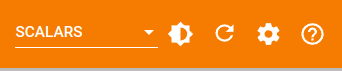

Ver el tab `DISTRIBUTIONS` o

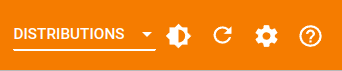

Ver el tab `HISTOGRAMS` o

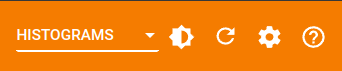


Ver el tab `HPARAMS` o

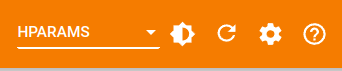

Ver el tab `PR CURVES` o

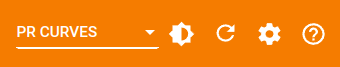

In [ ]:
# Ejecutamos la extensión para colab, le pasamos el direcorio que definimos anteriormente
!kill 1764
%tensorboard --logdir {tensorboard_logs_folder}

<IPython.core.display.Javascript object>